In [6]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

df = pd.read_csv("../data/data.csv", sep=",")

X = df.loc[:, df.columns != "is_alarm"]
y = df["is_alarm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = SGDClassifier(loss="hinge", penalty="l2", max_iter=500)
model.fit(X_train, y_train)

with open('stochastic-gradient-descent.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)

print(f"Accuracy: {accuracy:.2%} ({accuracy})")

feature_weights = model.coef_
feature_weights_mapping = pd.DataFrame(
    {
        "feature": [i for i in list(df.columns) if i != "is_alarm"],
        "weight": feature_weights[0],
    }
)
feature_weights_mapping = feature_weights_mapping.sort_values(
    by=["weight"], ascending=False
).head(20)
print("Top 20 features:")
print(feature_weights_mapping)


Accuracy: 89.33% (0.8933214369775958)
Top 20 features:
                feature     weight
109  global_alarm_count  21.834626
110     events_last_24h  21.802540
8       hour_conditions   5.703442
5        hour_windspeed   3.247100
0                  city   3.193535
2         hour_datetime   2.567194
3             hour_temp   2.168914
21              mykolay   0.513268
7       hour_cloudcover   0.424022
10              chernih   0.399760
1          day_datetime   0.395584
27                 btgs   0.374644
4           hour_precip   0.317130
52                  syr   0.267329
108           dvornikov   0.244205
51                 odes   0.243326
38           transnistr   0.241621
72                 town   0.168775
30              kilomet   0.166793
36             redeploy   0.161713


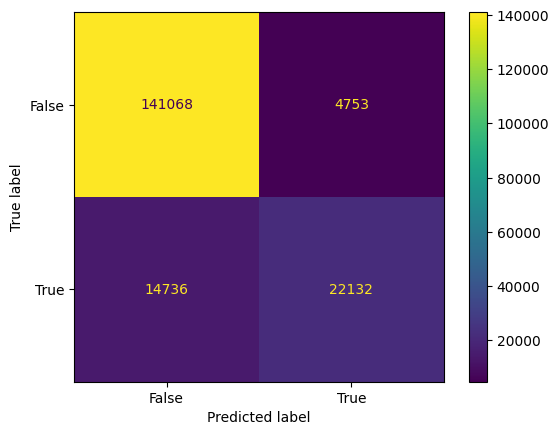

In [7]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()